Hineill Céspedes - 20213704

PREGUNTA 1

Pregunta 1 (1 punto)
El muestreo de la se˜nal:
x(t) = 5 cos(25πt2
) sin(90πt)
a una frecuencia de 1000 Hz, genera x[n]. Tomando en cuenta 256 bloques de 128 muestras cada uno,
desarrolle los siguientes ´ıtems, compare y comente lo obtenido:

a) Calcule y grafique los periodogramas utilizando los m´etodos Welch y Bartlett con traslape del 50%
y ventana de tipo Hann. Analice las diferencias entre ambos m´etodos. ¿Cu´al es m´as adecuado para
observar los componentes de frecuencia de la se˜nal?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from scipy.signal import lfilter

Text(0.5, 1.0, 'Periodograma utilizando método Welch con ventana tipo Hann y traslape de 50%')

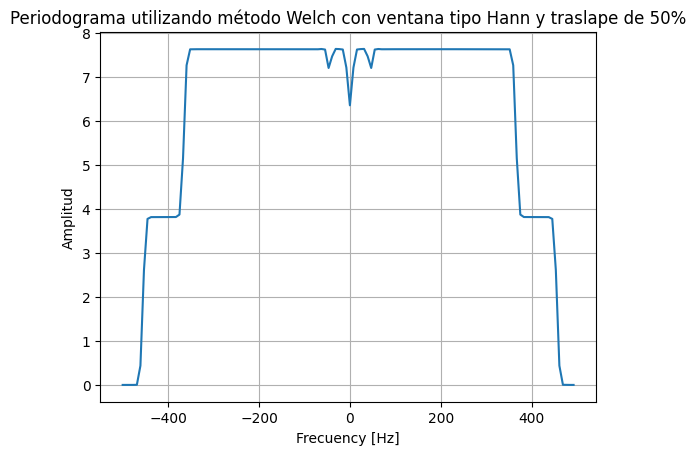

In [6]:
#METODO DE WELCH CON TRASLAPE 50% Y VENTANA DE TIPO 
L = 128
M = 256 
N = L*M 
fs = 1000 
Ts = 1./fs 
n = np.arange(N)
t = n*Ts
signal = 5*np.cos(25*np.pi*(t**2))*np.sin(90*np.pi*t)
Lo = int(L/2) 
w = np.hanning(L) /  np.sqrt(np.mean(  np.abs( np.hanning(L)  )**2  ))
signal_welch_frecuencia = np.zeros([M,L])
for m in range(M):
    signal_welch_frecuencia[m,:] = np.abs(np.fft.fft(w*signal[m*(L-Lo):m*(L-Lo) + L]))**2 / L
signal_welch_frecuencia = np.fft.fftshift(signal_welch_frecuencia,axes=1)
signal_welch_frecuencia_promedio = np.mean(signal_welch_frecuencia,axis=0)
frecuencias = (np.arange(L) - L/2) * fs / L
plt.figure()
plt.plot(frecuencias,signal_welch_frecuencia_promedio)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Amplitud')
plt.title('Periodograma utilizando método Welch con ventana tipo Hann y traslape de 50%')

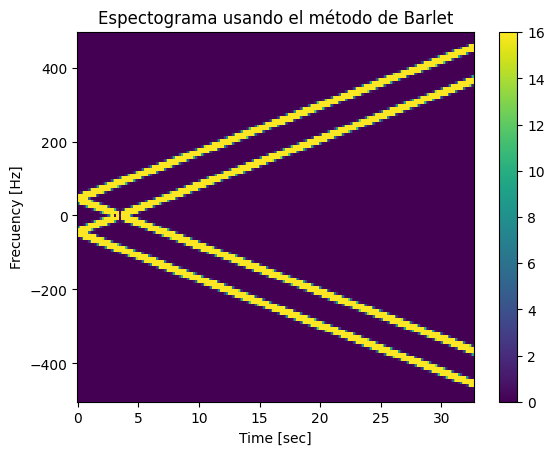

In [5]:
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,frecuencias,signal_welch_frecuencia.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.title("Espectograma usando el método de Barlet")
plt.clim([0,16])
plt.colorbar(c)

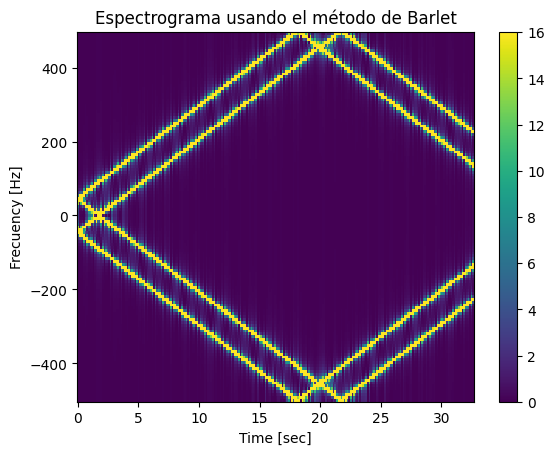

In [11]:
#METODO DE BARLET 
# Parámetros del periodograma y la señal muestreada
L = 128
M = 256 
N = L*M 
fs = 1000 
Ts = 1./fs 
n = np.arange(N)
t = n*Ts
signal = 5*np.cos(25*np.pi*(t**2))*np.sin(90*np.pi*t)

# Método Barlett
espectro_barlet = np.zeros([M,L])
for m in range(M):
    espectro_barlet[m,:] = np.abs(np.fft.fft(signal[m*L:(m+1)*L]))**2 / L

espectro_barlet = np.fft.fftshift(espectro_barlet,axes=1)
frecuencias = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,frecuencias,espectro_barlet.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.title("Espectrograma usando el método de Barlet")
plt.clim([0,16])
plt.colorbar(c)

Text(0, 0.5, 'Amplitud')

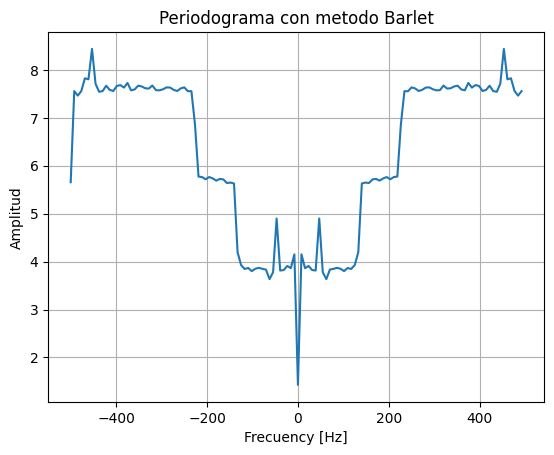

In [10]:
promedio_barlet = np.mean(espectro_barlet,axis=0)
plt.figure()
plt.plot(frecuencias,promedio_barlet)
plt.title("Periodograma con metodo Barlet")
plt.grid('on')
plt.xlabel('Frecuency [Hz]')
plt.ylabel('Amplitud')

PREGUNTA 2

Se tiene el siguiente sistema de diferencias:
y[n] − 1.3829y[n − 1] + 0.4128y[n − 2] = 0.0675x[n] + 0.1349x[n − 1] + 0.0675x[n − 2]
a) Utilizando ecuaciones recursivas, calcule y grafique la respuesta de estado cero con y[−1] = 0 y y[−2] =
1 para −2 ≤ n ≤ 100.

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from scipy.signal import lfilter
#ANEXO FUNCIONES PREGUNTA 2 

def respuesta_sistema_diferencias(cond1 , cond2 , signal , signal_idx):
    output =  np.zeros(len(signal)+2)
    output_idx =  np.concatenate(( np.array([signal_idx[0]-2 , signal_idx[0]-1]) , signal_idx ))
    signal_copy = np.concatenate((np.array([0 , 0]), signal   ))
    output[0]  = cond1
    output[1]  = cond2
    for i in range(len(signal)):
        output[i+2]  = 1.3829* output[i+1] -0.4128* output[i] + 0.0675*signal_copy[i+2] + 0.1349*signal_copy[i+1] + 0.0675* signal_copy[i] 
    return [output_idx,output]

def plotear(idx, x, title):
    plt.figure(figsize=(10, 6))
    (markerline, stemlines, baseline) = plt.stem(idx,x, linefmt='-.', markerfmt='o', basefmt='-', use_line_collection=True)

    plt.setp(stemlines, color='blue', linestyle='-', linewidth=2)  

    plt.setp(baseline, color='green', linewidth=1.5, linestyle='--') 

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('n', fontsize=14)
    plt.ylabel('Amplitud', fontsize=14)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.xlim(-3, np.max(idx))
    plt.ylim(1.5* np.min(x),1.5*np.max(x) )
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

C:\Users\Hineill\AppData\Local\Temp\ipykernel_30684\1574294843.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(idx,x, linefmt='-.', markerfmt='o', basefmt='-', use_line_collection=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


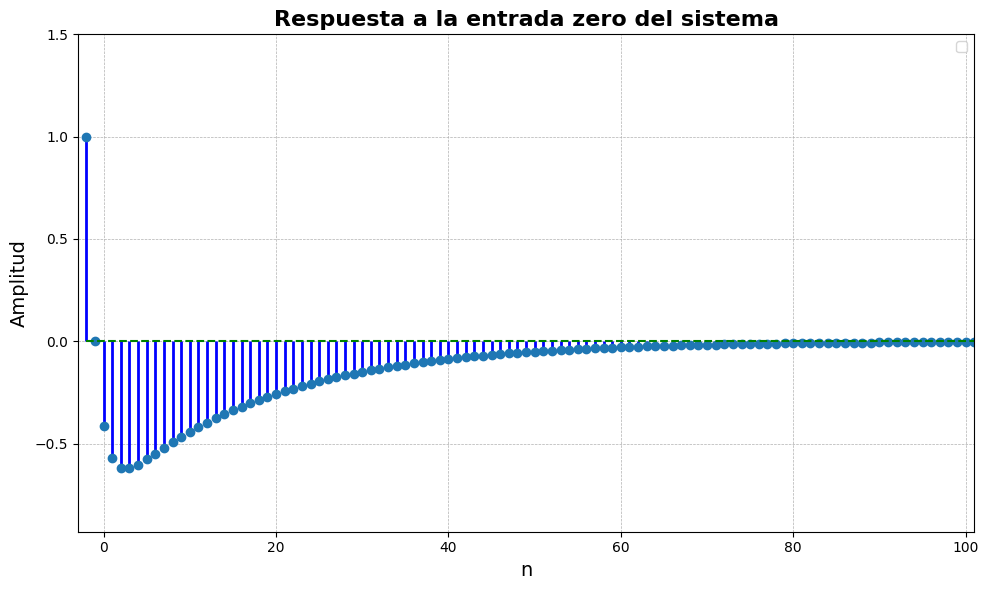

In [11]:
#Definimos la entrada como impulso
N_samples =102
dirac_signal =  np.zeros(N_samples)
dirac_signal_idx =  np.arange(len(dirac_signal))
[respuesta_impulso_idx , respuesta_impulso] =  respuesta_sistema_diferencias(1,0,dirac_signal ,dirac_signal_idx)
#PLOTEAMOS
plotear(respuesta_impulso_idx,respuesta_impulso, "Respuesta a la entrada zero del sistema")